In [4]:
import math as math
import numpy as np
import sympy as sm
import array as arr
import matplotlib.pyplot as plt
import pandas as pd
from lab_processing import print_errors, create_plot

In [5]:
#initial values
sm.var('x, epsilon_1, eplsilon_2, delta_1, delta_2, k, q, f, k_m, q_m, f_m')
delta_1 = 1
delta_2 = 1
epsilon_1 = 0
epsilon_2 = 0
k = sm.exp((sm.sin(x)))
q = sm.exp((sm.cos(x)))
f = sm.S(1)
#model task
k_m = k.subs(x, 0.5)
q_m = q.subs(x, 0.5)
f_m = sm.S(1)

## Analytical solution of the model task

In [6]:
sm.var('lambda_1, lambda_2, C_1, C_2, u_m')

(lambda_1, lambda_2, C_1, C_2, u_m)

In [7]:
lambda_1 = sm.sqrt(q_m/k_m)

In [8]:
lambda_2 = -sm.sqrt(q_m/k_m)

In [9]:
C_1 = (((k_m*lambda_2 + delta_2)*(delta_1*f_m - epsilon_1*q_m)*sm.exp(lambda_2) 
       +
       (k_m*lambda_2 - delta_1)*(delta_2*f_m - epsilon_2*q_m)
       )
       /
       (q_m*((k_m*lambda_1 - delta_1)*(k_m*lambda_2 + delta_2)*sm.exp(lambda_2)
            -
            (k_m*lambda_2 - delta_1)*((k_m*lambda_1 + delta_2)*sm.exp(lambda_1)))
       )
      )

In [10]:
C_2 = (((k_m*lambda_1 + delta_2)*(delta_1*f_m - epsilon_1*q_m)*sm.exp(lambda_1) 
       +
       (k_m*lambda_1 - delta_1)*(delta_2*f_m - epsilon_2*q_m)
       )
       /
       (q_m*((k_m*lambda_2 - delta_1)*(k_m*lambda_1 + delta_2)*sm.exp(lambda_1)
            -
            (k_m*lambda_2 + delta_2)*((k_m*lambda_1 - delta_1)*sm.exp(lambda_2)))
       )
      )

In [11]:
u_m = C_1 * sm.exp(lambda_1*x) + C_2 * sm.exp(lambda_2*x) + f_m/q_m

In [12]:
u_m

-0.0457161991663027*exp(1.22027776815162*x) + 0.415786836673858 - 0.15489236723562*exp(-1.22027776815162*x)

## Numerical solution of the model task

In [24]:
x_0 = 0
x_L = 1
L = 40
h = (x_L-x_0)/L
x_grid = np. arange(x_0, x_L+0.00001, h)

In [25]:
#page70
a = [k_m for _ in range(L+1)]
b = [-2*k_m - q_m*h**2 for _ in range(L+1)]
c = [k_m for _ in range(L+1)]
d = [-f_m*h**2 for _ in range(L+1)]

a[0] = k_m
a[L] = sm.S(0.0)
b[0] = -k_m - delta_1*h
b[L] = -k_m - delta_2*h
c[0] = sm.S(0.0)
c[L] = k_m
d[0] = sm.S(-epsilon_1*h)
d[L] = sm.S(-epsilon_2*h)

In [26]:
#page 71
def create_ugrid(a,b,c,d):
    alpha = [None] * (L+1)
    alpha[0] = -a[0]/b[0]
    for l in range(1, L+1):
        alpha[l] = -(a[l])/(b[l] + c[l]*alpha[l-1])
    betta = [None] * (L+1)
    betta[0] = d[0]/b[0]
    for l in range(1, L+1):
        betta[l] = (d[l] - c[l]*betta[l-1])/(b[l] + c[l]*alpha[l-1])
    
    u_grid = [None] * (L+1)
    u_grid[L] = (d[L] - c[L] * betta[L-1])/(b[L] + c[L]*alpha[L-1])
    for l in range(L, -1, -1):
        u_grid[l-1] = alpha[l-1]*u_grid[l] + betta[l-1]
        
    return u_grid

u_grid = create_ugrid(a,b,c,d)

Graphs

In [27]:
u_m_grid = [None] * (L+1)
for l in range(0, L+1):
    u_m_grid[l] = u_m.subs(x, x_grid[l])

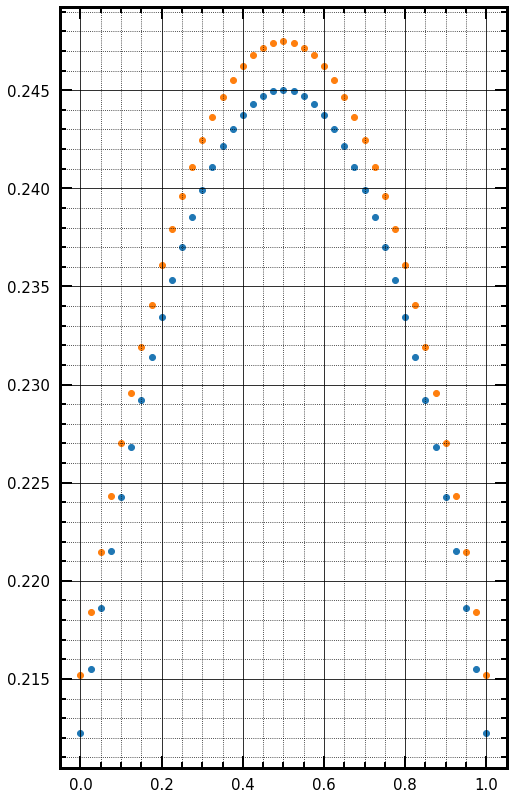

In [28]:
fig, ax = create_plot(10,10)
ax.scatter(x_grid, u_grid)
ax.scatter(x_grid, u_m_grid)
fig.set_figwidth(8)
fig.set_figheight(14)


## Variable coefficients

In [29]:
a = [k.subs(x, x_grid[l] + h/2) for l in range(L+1)]
b = [-(k.subs(x, x_grid[l] + h/2) + k.subs(x, x_grid[l] - h/2) + q.subs(x, x_grid[l])*h**2) for l in range(L+1)]
c = [k.subs(x, x_grid[l] - h/2) for l in range(L+1)]
d = [-f.subs(x, x_grid[l])*h**2 for l in range(L+1)]

a[0] = k.subs(x, x_grid[0])
a[L] = sm.S(0.0)
b[0] = -k.subs(x, x_grid[0]) - delta_1*h
b[L] = -k.subs(x, x_grid[L]) - delta_2*h
c[0] = sm.S(0.0)
c[L] = k.subs(x, x_grid[L])
d[0] = sm.S(-epsilon_1*h)
d[L] = sm.S(-epsilon_2*h)

In [30]:
u_grid_v = create_ugrid(a,b,c,d)

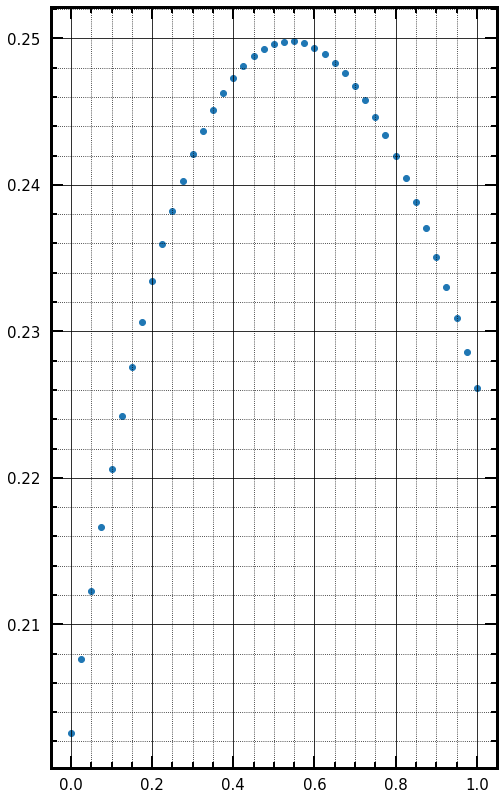

In [31]:
fig, ax = create_plot(10,10)
ax.scatter(x_grid, u_grid_v)

fig.set_figwidth(8)
fig.set_figheight(14)

In [32]:
dataset = pd.DataFrame({'x':x_grid,'v':u_grid_v, 'A' : u_m_grid, 'N' : u_grid})
bb = dataset.T
bb

0                  1                  2                  3   \
x                  0              0.025               0.05              0.075   
v  0.202563891130406  0.207627988408666  0.212304751155129  0.216617460204472   
A  0.215178270271936  0.218416060392487  0.221470148486772  0.224343377134538   
N  0.212234776551452  0.215519847028024  0.218618534295439  0.221533722220269   

                  4                  5                  6                  7   \
x                0.1              0.125               0.15              0.175   
v  0.220587560886195  0.224234791244809  0.227577303067225  0.230631775897228   
A  0.227038420581356  0.229557787227668  0.231903821963462  0.234078708350780   
N  0.224268123891085  0.226824284143456  0.229204581928360  0.231411232526214   

                  8                  9   ...                 31  \
x                0.2              0.225  ...              0.775   
v  0.233413524236988  0.235936598151666  ...  0.243391266912391   
A  0.236084470656047  0.237922975734160  ...  0.237922975734160   
N  0.233446289608569  0.235311647149420  ...  0.235311647149419   

                  32                 33                 34                 35  \
x                0.8              0.825               0.85              0.875   
v  0.241996473679658  0.240470246076528  0.238813296934471  0.237026139304246   
A  0.236084470656047  0.234078708350780  0.231903821963462  0.229557787227668   
N  0.233446289608568  0.231411232526212  0.229204581928359  0.226824284143455   

                  36                 37                 38                 39  \
x                0.9              0.925               0.95              0.975   
v  0.235109092926142  0.233062289500883  0.230885676847952  0.228579022030868   
A  0.227038420581356  0.224343377134538  0.221470148486772  0.218416060392487   
N  0.224268123891083  0.221533722220267  0.218618534295438  0.215519847028023   

                  40  
x                  1  
v  0.226141913522059  
A  0.215178270271936  
N  0.212234776551451  

[4 rows x 41 columns]

In [33]:
arr = np.arange(x_0, x_L + 0.00001, 0.1)
diff_ua_uN = np.empty(x_grid.size)
for i in range(L+1):
    if x_grid[i] in arr:
        diff_ua_uN[i] = abs(u_m_grid[i] - u_grid[i])


In [34]:
max(diff_ua_uN)

0.002943493720484247